In [1]:
import numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
movie_df = pd.read_csv('DataSet_Clean/Movie_Clean.csv')
movie_df.head(5)

budget                   genres   id                                           overview  popularity                                        poster_path     production_companies      revenue  runtime spoken_languages      title  vote_average  vote_count                          cast          crew                                           keywords  rating
0  30000000  Animation Comedy Family  862  Led by Woody, Andy's toys live happily in his ...          21  <img src='https://image.tmdb.org/t/p/w185//rhI...  Pixar Animation Studios 373554033.00    81.00          English  Toy Story          7.70     5415.00  TomHanks TimAllen DonRickles  JohnLasseter  jealousy toy boy friendship friends rivalry bo...    3.00
1  30000000  Animation Comedy Family  862  Led by Woody, Andy's toys live happily in his ...          21  <img src='https://image.tmdb.org/t/p/w185//rhI...  Pixar Animation Studios 373554033.00    81.00          English  Toy Story          7.70     5415.00  TomHanks TimAllen DonRickles  JohnLasseter  jealousy toy boy friendship friends rivalry bo...    4.00
2  30000000  Animation Comedy Family  862  Led by Woody, Andy's toys live happily in his ...          21  <img src='https://image.tmdb.org/t/p/w185//rhI...  Pixar Animation Studios 373554033.00    81.00          English  Toy Story          7.70     5415.00  TomHanks TimAllen DonRickles  JohnLasseter  jealousy toy boy friendship friends rivalry bo...    5.00
3  30000000  Animation Comedy Family  862  Led by Woody, Andy's toys live happily in his ...          21  <img src='https://image.tmdb.org/t/p/w185//rhI...  Pixar Animation Studios 373554033.00    81.00          English  Toy Story          7.70     5415.00  TomHanks TimAllen DonRickles  JohnLasseter  jealousy toy boy friendship friends rivalry bo...    2.00
4  30000000  Animation Comedy Family  862  Led by Woody, Andy's toys live happily in his ...          21  <img src='https://image.tmdb.org/t/p/w185//rhI...  Pixar Animation Studios 373554033.00    81.00          English  Toy Story          7.70     5415.00  TomHanks TimAllen DonRickles  JohnLasseter  jealousy toy boy friendship friends rivalry bo...    3.50

In [3]:
movie_df.columns

Index(['budget', 'genres', 'id', 'overview', 'popularity', 'poster_path', 'production_companies', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'rating'], dtype='object')

In [4]:
movie_df.shape

(28576, 17)

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28576 entries, 0 to 28575
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                28576 non-null  int64  
 1   genres                28532 non-null  object 
 2   id                    28576 non-null  int64  
 3   overview              28576 non-null  object 
 4   popularity            28576 non-null  int64  
 5   poster_path           28576 non-null  object 
 6   production_companies  27519 non-null  object 
 7   revenue               28576 non-null  float64
 8   runtime               28576 non-null  float64
 9   spoken_languages      28377 non-null  object 
 10  title                 28576 non-null  object 
 11  vote_average          28576 non-null  float64
 12  vote_count            28576 non-null  float64
 13  cast                  28444 non-null  object 
 14  crew                  28550 non-null  object 
 15  keywords           

In [6]:
null_val = round(movie_df.isnull().sum() / len(movie_df) * 100, 2)
null_val[null_val > 0]

genres                 0.15
production_companies   3.70
spoken_languages       0.70
cast                   0.46
crew                   0.09
keywords               4.08
dtype: float64

In [7]:
movie_df.describe()

budget        id  popularity       revenue  runtime  vote_average  vote_count   rating
count     28576.00  28576.00    28576.00      28576.00 28576.00      28576.00    28576.00 28576.00
mean   26082834.38  24332.77        9.04   90983155.91   109.33          6.54      790.32     3.16
std    41373340.92  46198.72       11.59  178841432.27    26.33          0.91     1398.24     1.22
min           0.00      2.00        0.00          0.00     0.00          0.00        0.00     0.50
25%           0.00   2768.75        5.00          0.00    95.00          6.00       72.00     2.00
50%     8000000.00  10625.00        8.00   20040926.00   106.00          6.60      253.00     3.00
75%    35000000.00  22256.00       11.00  102308889.00   120.00          7.20      845.00     4.00
max   380000000.00 410921.00      547.00 2787965087.00  1140.00         10.00    14075.00     5.00

In [8]:
movie_df['Average Rating'] = movie_df.groupby('title')['rating'].transform('mean')
movie_df = movie_df.drop_duplicates(subset = 'title').reset_index(drop=True)
movie_df.drop('Average Rating', inplace  = True, axis = 1)
movie_df.head()

budget                    genres     id                                           overview  popularity                                        poster_path                               production_companies      revenue  runtime  spoken_languages                        title  vote_average  vote_count                                        cast            crew                                           keywords  rating
0  30000000   Animation Comedy Family    862  Led by Woody, Andy's toys live happily in his ...          21  <img src='https://image.tmdb.org/t/p/w185//rhI...                            Pixar Animation Studios 373554033.00    81.00           English                    Toy Story          7.70     5415.00                TomHanks TimAllen DonRickles    JohnLasseter  jealousy toy boy friendship friends rivalry bo...    3.00
1  65000000  Adventure Fantasy Family   8844  When siblings Judy and Peter discover an encha...          17  <img src='https://image.tmdb.org/t/p/w185//vzm...  TriStar Pictures Teitler Film Interscope Commu... 262797249.00   104.00  English Français                      Jumanji          6.90     2413.00     RobinWilliams JonathanHyde KirstenDunst     JoeJohnston  boardgame disappearance basedonchildren'sbook ...    2.00
2         0            Romance Comedy  15602  A family wedding reignites the ancient feud be...          11  <img src='https://image.tmdb.org/t/p/w185//6ks...                        Warner Bros. Lancaster Gate         0.00   101.00           English             Grumpier Old Men          6.50       92.00        WalterMatthau JackLemmon Ann-Margret    HowardDeutch     fishing bestfriend duringcreditsstinger oldmen    4.00
3  16000000      Comedy Drama Romance  31357  Cheated on, mistreated and stepped on, the wom...           3  <img src='https://image.tmdb.org/t/p/w185//16X...             Twentieth Century Fox Film Corporation  81452156.00   127.00           English            Waiting to Exhale          6.10       34.00  WhitneyHouston AngelaBassett LorettaDevine  ForestWhitaker  basedonnovel interracialrelationship singlemot...    3.00
4         0                    Comedy  11862  Just when George Banks has recovered from his ...           8  <img src='https://image.tmdb.org/t/p/w185//e64...          Sandollar Productions Touchstone Pictures  76578911.00   106.00           English  Father of the Bride Part II          5.70      173.00         SteveMartin DianeKeaton MartinShort    CharlesShyer  baby midlifecrisis confidence aging daughter m...    4.50

In [9]:
movie_df.shape

(8741, 17)

In [10]:
movie_df.duplicated().sum()

0

    As the Data Decreases from 27k to 8k seems that there were duplicated values here so needed now to go in the 
    further Processs to get the final Result.

##### Working on EDA (Exploratory Data Analysis ) to extract useful things.

In [11]:
movie_df.columns

Index(['budget', 'genres', 'id', 'overview', 'popularity', 'poster_path', 'production_companies', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'rating'], dtype='object')

In [12]:
num_list =  movie_df.select_dtypes(include = ['number']).columns.tolist()
num_list

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'rating']

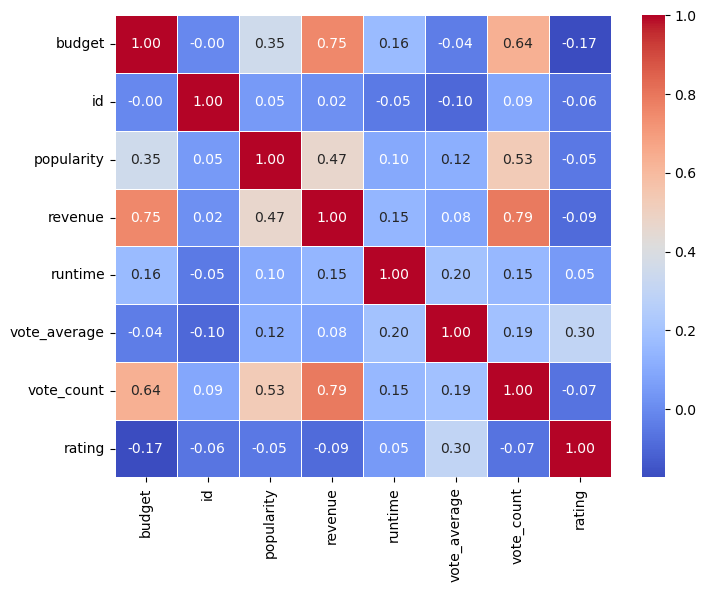

In [13]:
df_selected = movie_df[num_list]
corr_matrix = df_selected.corr()

plt.figure(figsize = [8, 6])
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

In [14]:
movie_df.columns

Index(['budget', 'genres', 'id', 'overview', 'popularity', 'poster_path', 'production_companies', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'rating'], dtype='object')

<Axes: xlabel='budget'>

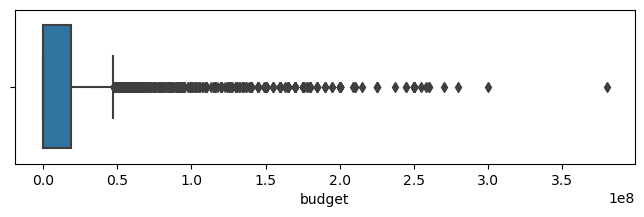

In [15]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['budget'])

    As the budget seems that minimum value of the movies are 0 and most are above 1.5 CR in INR that determines that
    the movies are divided in the range between 0 to 10 CR.    

In [16]:
def dist(data, col) :
    mean_val = data[col].mean() 
    median_val = data[col].median()
    mode_val = data[col].mode()[0]

    sns.histplot(data[col], kde=False, color='lightblue')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='--', label='Median')
    plt.axvline(mode_val, color='blue', linestyle='--', label='Mode')
    plt.xticks(rotation = 45)
    plt.legend()

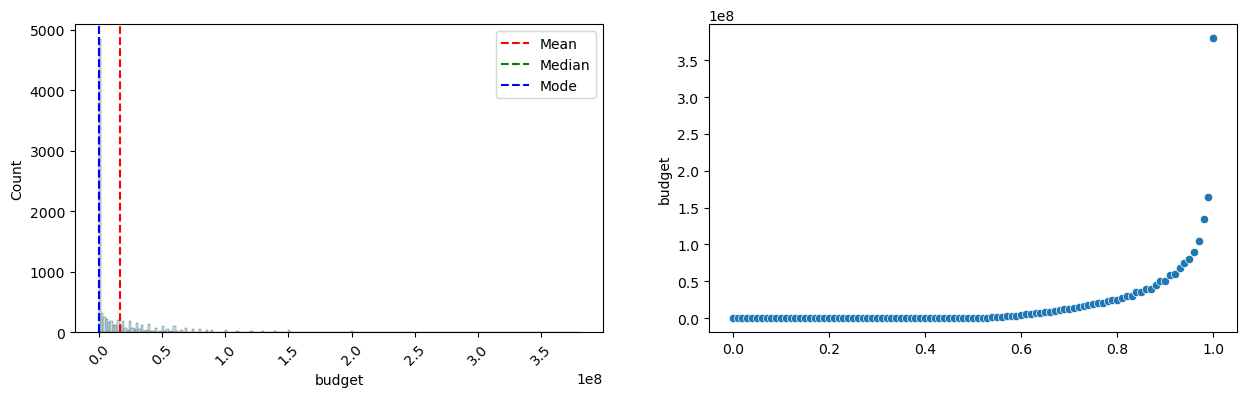

In [17]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'budget')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['budget'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [18]:
movie_df['revenue']
# Same goes for teh revenue here the most of the production revenues are not given so lets find some dependencies of it.

0      373554033.00
1      262797249.00
2              0.00
3       81452156.00
4       76578911.00
           ...     
8736           0.00
8737           0.00
8738           0.00
8739    16180000.00
8740           0.00
Name: revenue, Length: 8741, dtype: float64

<Axes: xlabel='revenue'>

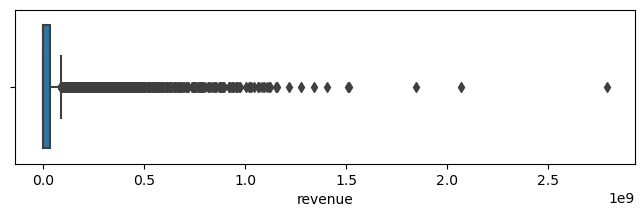

In [19]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['revenue'])

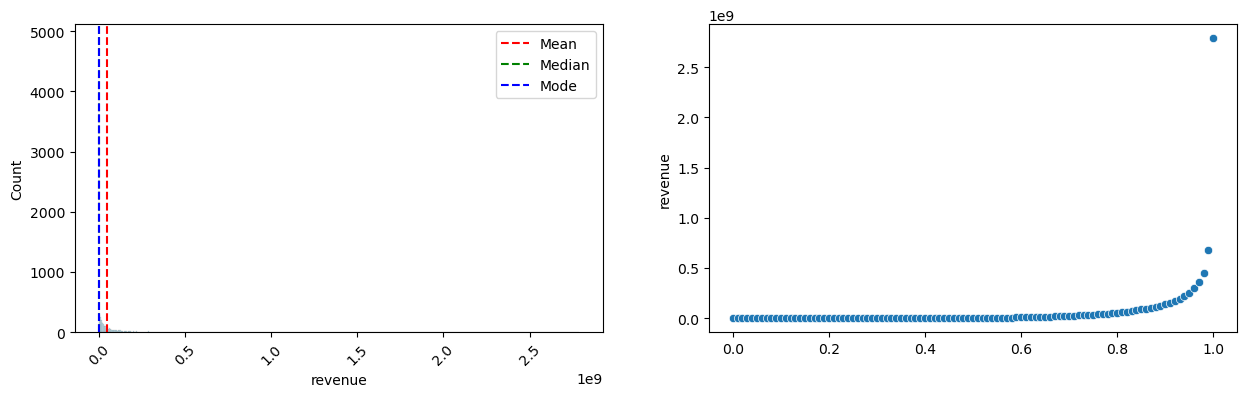

In [20]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'revenue')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['revenue'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [21]:
def bar_plot (col, targ) :
    avg_budget = movie_df.groupby(col)[targ].sum().reset_index()
    avg_budget.columns = [col, targ]
    top_budget = avg_budget.sort_values(by = targ, ascending = False).head(20)
    top_budget[col] = top_budget[col].apply(lambda x: ' '.join(x.split()[:2]))
    # top_budget.head(1)

    plt.bar(top_budget[col], top_budget[targ], width = 0.5)
    plt.title(f'Top {col} by {targ}')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{targ} (in Rs)')
    plt.xticks(rotation = 90)
    plt.grid(axis = 'y')
    plt.tight_layout()

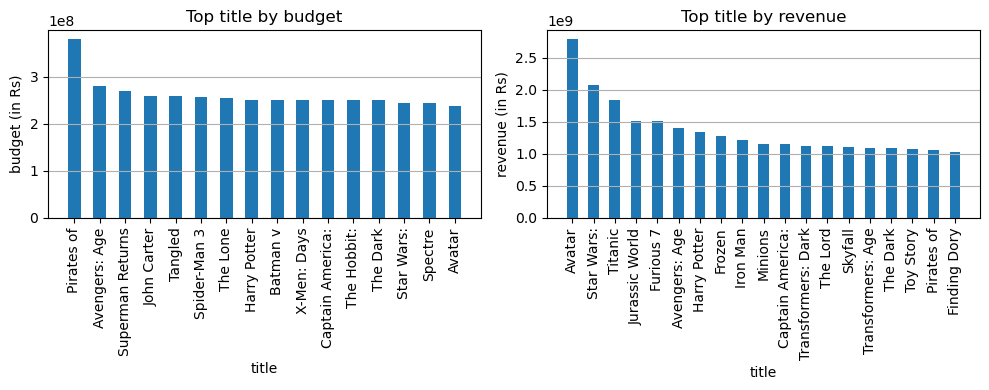

In [22]:
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
bar_plot('title', 'budget')
plt.subplot(1, 2, 2)
bar_plot('title', 'revenue')
plt.show()

In [23]:
def combined_bar_plot(data, col, col_1, col_2):
    total_data = data.groupby(col).agg({col_1: 'sum', col_2: 'sum'}).reset_index()
    total_data.columns = [col, col_1, col_2]    
    # Sort by revenue in ascending order
    top_data = total_data.sort_values(by = col_2, ascending = False).head(20)
    top_data[col] = top_data[col].apply(lambda x: ' '.join(x.split()[:3]))

    x = range(len(top_data))
    
    plt.bar(x, top_data[col_1], width=0.5, label='Budget', color='skyblue', align='center')    
    plt.bar([p + 0.5 for p in x], top_data[col_2], width=0.5, label='Revenue', color='salmon', align='center')
    plt.title(f'Top 20 Movies by {col_1} and {col_2}')
    plt.xlabel(f'Movie {col}')
    plt.ylabel('Amount (in Rs)')
    plt.xticks([p + 0.5 / 2 for p in x], top_data[col], rotation=45)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()

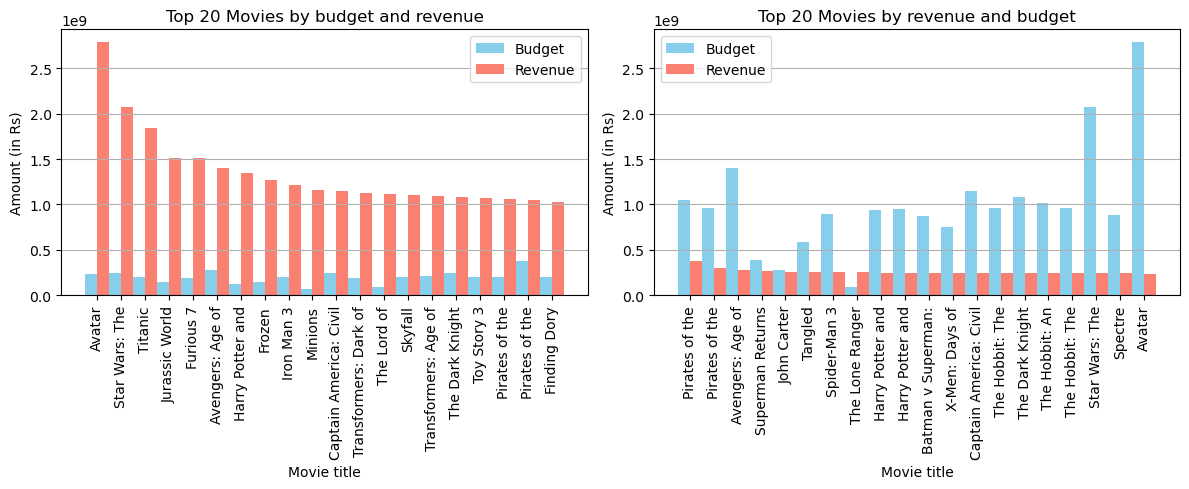

In [24]:
plt.figure(figsize=[12, 5])    
plt.subplot(1, 2, 1)
combined_bar_plot(movie_df, 'title', 'budget', 'revenue')
plt.subplot(1, 2, 2)
combined_bar_plot(movie_df, 'title', 'revenue', 'budget')
plt.show()

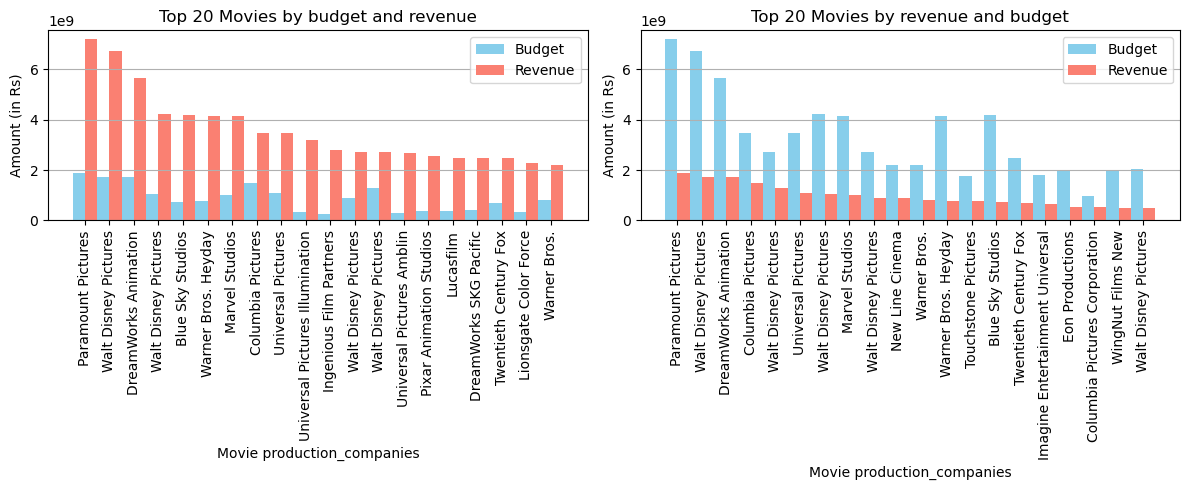

In [25]:
plt.figure(figsize=[12, 5])    
plt.subplot(1, 2, 1)
combined_bar_plot(movie_df, 'production_companies', 'budget', 'revenue')
plt.subplot(1, 2, 2)
combined_bar_plot(movie_df, 'production_companies', 'revenue', 'budget')
plt.show()

    Following Insights on Budget and Revenue Comparison
        1. Movie Titles: From our analysis, we see that the highest budgets were allocated to movies like 
            Avatar, Star Wars, and Titanic. However, the movies that generated the most revenue include 
            Spider-Man 3, Pirates of the Caribbean, and The Dark Knight.

        2. Production Companies: When it comes to production companies, Walt Disney, Paramount, and Marvel spent 
            the most on their films. These companies also earned the highest revenues. While there are many 
            other companies in the industry, these three stand out as the top producers of successful films.

In [26]:
filtered_movies = movie_df[(movie_df['budget'] > 0) & (movie_df['revenue'] > 0)]

top_10_titles = filtered_movies.nlargest(10, 'revenue')

fig = px.scatter(filtered_movies, x = 'budget', y = 'revenue', title = 'Top 10 Movies with Positive Budget and Revenue',
    labels = {'budget': 'Budget (in Rs)', 'revenue': 'Revenue (in Rs)'},
    color = 'revenue', size = 'budget', size_max = 15, color_continuous_scale = px.colors.sequential.Viridis,
    hover_name = 'title',
)

fig.show()

##### Some points i got

    The Avatar budget is 23 Cr and the most it has earned 206 Cr with next Titanic with budget of 24 Cr and 200 cr revenue
    and the Most watched Show also and can say that the hollywood movies are most set to get new movies with there 
    production sector.
    
    
    Maximum moives ldirector didmn'4 give the actual figure of there budget so they declared them as 0 budget movie and 
    also the revenue is declared as 0. Maybe they dont wanna figure out the values

In [27]:
filtered_movies = movie_df[(movie_df['budget'] > 100000000) & (movie_df['revenue'] > 100000000)]
# filtered_movies = movie_df[(movie_df['budget'] > 0) & (movie_df['revenue'] > 0)]

top_10_titles = filtered_movies.nlargest(10, 'revenue')

fig = px.scatter(filtered_movies, x = 'budget', y = 'revenue', title = 'Top 10 Movies with Positive Budget and Revenue',
    labels = {'budget': 'Budget (in Rs)', 'revenue': 'Revenue (in Rs)'},
    color = 'revenue', size = 'budget', size_max = 15, color_continuous_scale = px.colors.sequential.Viridis,
    hover_name = 'title',
)

fig.show()

In [28]:
movie_df['genres']

0               Animation Comedy Family
1              Adventure Fantasy Family
2                        Romance Comedy
3                  Comedy Drama Romance
4                                Comedy
                     ...               
8736       Comedy Horror ScienceFiction
8737                              Drama
8738                   Thriller Romance
8739    Adventure Drama History Romance
8740                  Documentary Music
Name: genres, Length: 8741, dtype: object

In [29]:
genre_counts = movie_df['genres'].str.split(expand=True).stack().value_counts()
unique_genres = genre_counts.reset_index()
unique_genres.columns = ['Genre', 'Title Count']
unique_genres.head()

Genre  Title Count
0     Drama         4456
1    Comedy         3289
2  Thriller         1915
3   Romance         1784
4    Action         1680

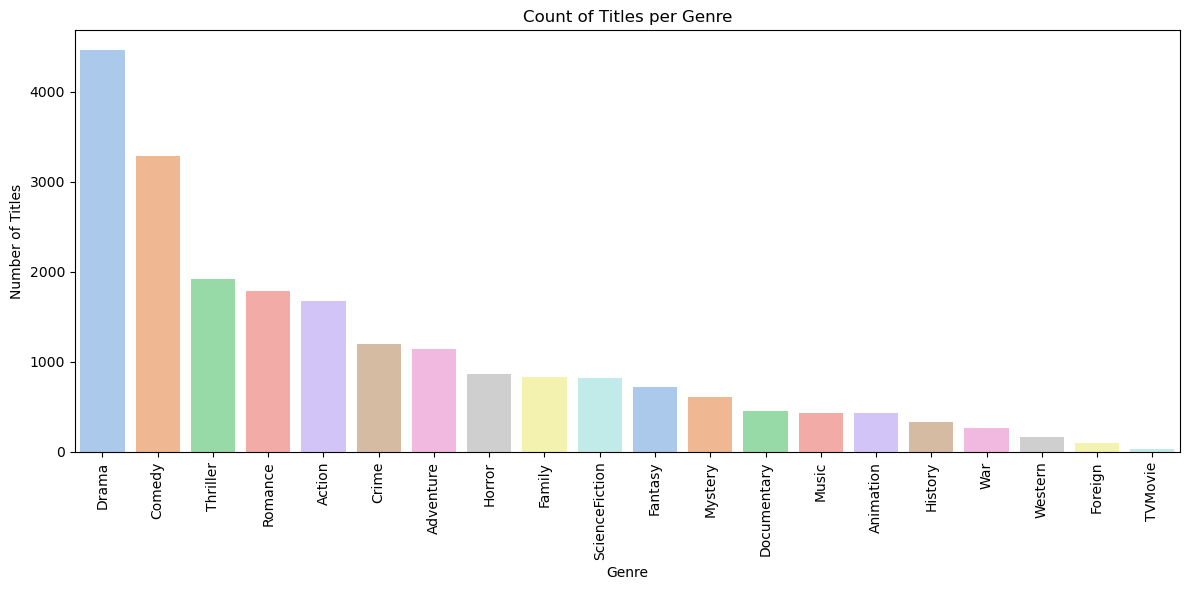

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x = unique_genres['Genre'], y = unique_genres['Title Count'], palette = 'pastel')

plt.title('Count of Titles per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 90)
# plt.grid(axis = 'x', linestyle= ' --', alpha = 0.7)
plt.tight_layout()
plt.show()

    It seems that movies with genres like Drama, Comedy, Thriller, Action, Romance, and Adventure are the most popular
    among viewers. Most people prefer dramatic and comedy films. So, it’s a good idea to recommend movies in these genres.

    Lets Check the Popularity on the basis of movies.

In [31]:
movie_df['popularity'].describe()

count   8741.00
mean       6.76
std        9.45
min        0.00
25%        2.00
50%        6.00
75%        9.00
max      547.00
Name: popularity, dtype: float64

<Axes: xlabel='popularity'>

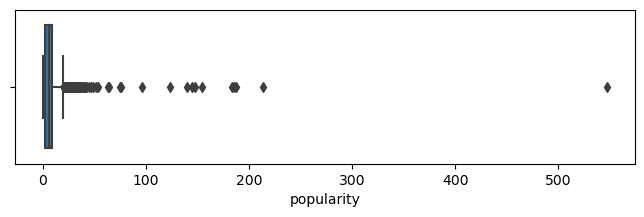

In [32]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['popularity'])

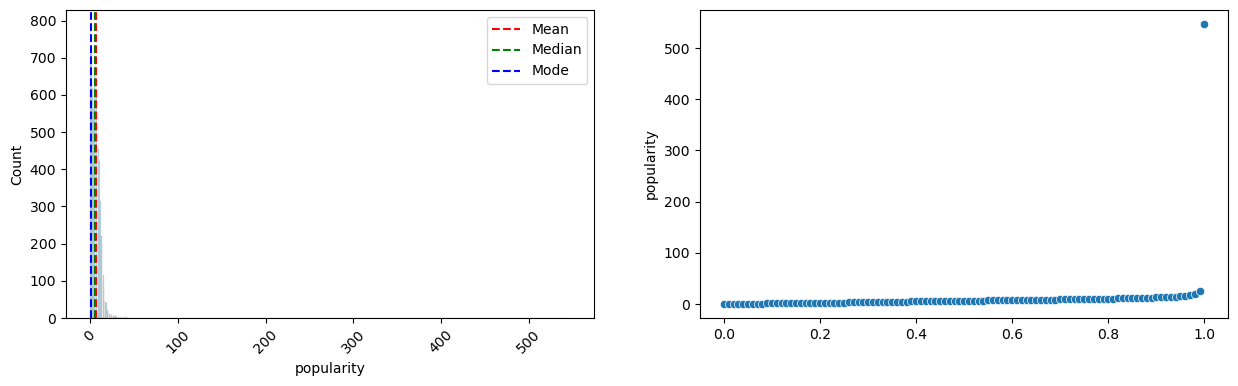

In [33]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'popularity')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['popularity'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [34]:
movie_df['popularity'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1])
# Here we have detected some Outliers and this are not so much important so need tok resolve it.

0.25     2.00
0.50     6.00
0.75     9.00
0.90    13.00
0.95    15.00
0.99    25.00
1.00   547.00
Name: popularity, dtype: float64

In [35]:
def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return col

In [36]:
outlier_remover(movie_df['popularity'])
movie_df['popularity'].head(1)

0   19.50
Name: popularity, dtype: float64

<Axes: xlabel='popularity'>

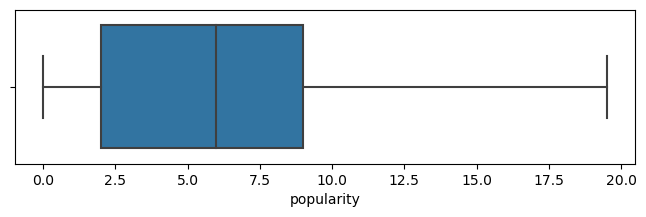

In [37]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['popularity'])

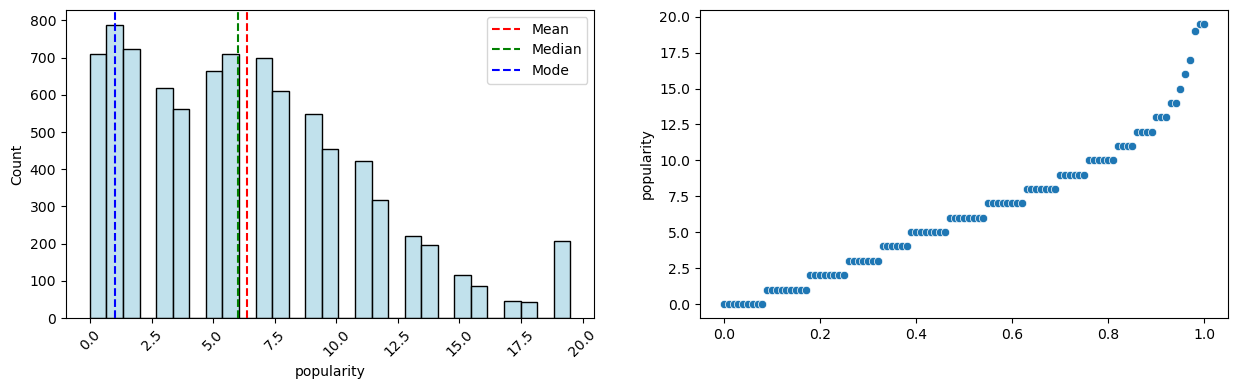

In [38]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'popularity')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['popularity'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [39]:
max_rat = movie_df.groupby('genres')['revenue'].sum()
max_rat.sort_values(ascending = False).head(10)

genres
Comedy                            19582422209.00
Drama                             14656087841.00
Comedy Romance                    11695326841.00
Animation Family                   8092307542.00
Action Adventure ScienceFiction    7988364914.00
Adventure Action ScienceFiction    7654792640.00
Adventure Fantasy Action           7404507582.00
Comedy Drama Romance               7126739032.00
Drama Romance                      6430363453.00
Adventure Fantasy Family           5967541473.00
Name: revenue, dtype: float64

In [40]:
# Seems that Comedy is the most likely like movie genre in the in all genre categories and the most revenue also can generate.

In [41]:
max_rat = movie_df.groupby('genres')['budget'].sum()
max_rat.sort_values(ascending = False).head(10)

genres
Comedy                             6241414000
Drama                              4867285504
Comedy Romance                     3267983495
Drama Romance                      2410547475
Action Adventure ScienceFiction    2256305523
Comedy Drama Romance               2109734699
Animation Family                   2089589699
Comedy Drama                       1761974296
Action Thriller                    1751400000
Action Adventure Thriller          1642000000
Name: budget, dtype: int64

    Looks same that Comedy movies are also set for budget and the most like one by the directors also.

In [42]:
movie_df.columns

Index(['budget', 'genres', 'id', 'overview', 'popularity', 'poster_path', 'production_companies', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'rating'], dtype='object')

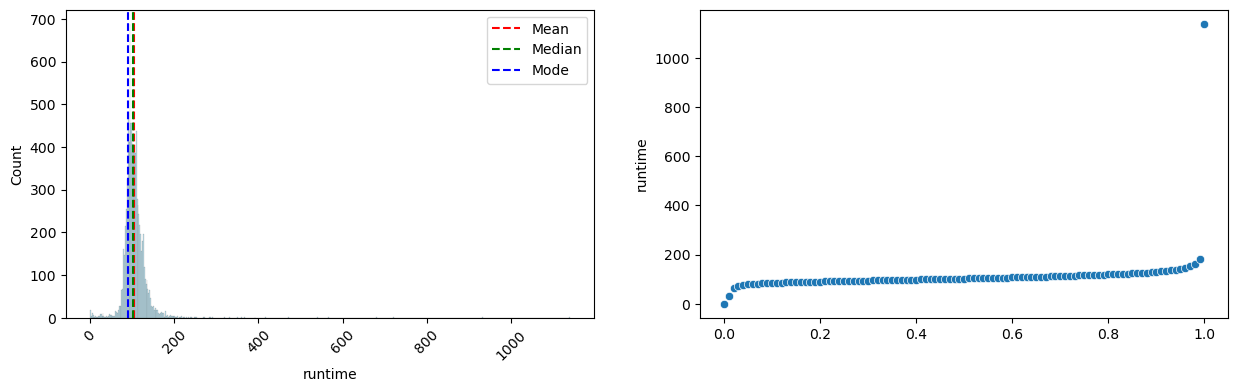

In [43]:
plt.figure(figsize = [15, 4])
plt.subplot(1, 2, 1)
dist(movie_df, 'runtime')
plt.subplot(1, 2, 2)
sns.scatterplot(movie_df['runtime'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [44]:
movie_df[movie_df['runtime'] > 600]

budget             genres      id                                           overview  popularity                                        poster_path                               production_companies  revenue  runtime  spoken_languages                       title  vote_average  vote_count                                      cast                    crew                             keywords  rating
5723       0  Documentary Drama   30983  Tom Hanks, Imagine Entertainment and HBO prese...        3.00  <img src='https://image.tmdb.org/t/p/w185//yEC...                          Imagine Entertainment HBO     0.00   720.00           English  From the Earth to the Moon          8.40       26.00             TomHanks NickSearcy LaneSmith         MichaelGrossman                                  NaN    2.50
7010       0              Drama   45560  Berlin Alexanderplatz, originally broadcast in...        2.00  <img src='https://image.tmdb.org/t/p/w185//gMp...  Bavaria Film Westdeutscher Rundfunk (WDR) RAI ...     0.00   931.00           Deutsch       Berlin Alexanderplatz          8.40        5.00  GünterLamprecht ClausHolm HannaSchygulla  RainerWernerFassbinder                                  NaN    2.50
7720       0        Documentary   26397  This highly acclaimed mini series traces the c...        3.00  <img src='https://image.tmdb.org/t/p/w185//r4s...  Florentine Films American Documentaries Inc. K...     0.00   680.00  English Français               The Civil War          9.20       15.00     SamWaterston JulieHarris JasonRobards                KenBurns  slavery americancivilwar robertelee    5.00
7916       0        Documentary  142051  A survey of the musical form's history and maj...        1.00  <img src='https://image.tmdb.org/t/p/w185//7x0...                                                NaN     0.00  1140.00               NaN                        Jazz          5.70        3.00                                KeithDavid                KenBurns                                  NaN    4.00

In [45]:
movie_df.drop(7916, inplace = True)

In [46]:
movie_df[movie_df['runtime'] > 600]

budget             genres     id                                           overview  popularity                                        poster_path                               production_companies  revenue  runtime  spoken_languages                       title  vote_average  vote_count                                      cast                    crew                             keywords  rating
5723       0  Documentary Drama  30983  Tom Hanks, Imagine Entertainment and HBO prese...        3.00  <img src='https://image.tmdb.org/t/p/w185//yEC...                          Imagine Entertainment HBO     0.00   720.00           English  From the Earth to the Moon          8.40       26.00             TomHanks NickSearcy LaneSmith         MichaelGrossman                                  NaN    2.50
7010       0              Drama  45560  Berlin Alexanderplatz, originally broadcast in...        2.00  <img src='https://image.tmdb.org/t/p/w185//gMp...  Bavaria Film Westdeutscher Rundfunk (WDR) RAI ...     0.00   931.00           Deutsch       Berlin Alexanderplatz          8.40        5.00  GünterLamprecht ClausHolm HannaSchygulla  RainerWernerFassbinder                                  NaN    2.50
7720       0        Documentary  26397  This highly acclaimed mini series traces the c...        3.00  <img src='https://image.tmdb.org/t/p/w185//r4s...  Florentine Films American Documentaries Inc. K...     0.00   680.00  English Français               The Civil War          9.20       15.00     SamWaterston JulieHarris JasonRobards                KenBurns  slavery americancivilwar robertelee    5.00

In [47]:
movie_df[['title', 'vote_count', 'vote_average']]

title  vote_count  vote_average
0                                             Toy Story     5415.00          7.70
1                                               Jumanji     2413.00          6.90
2                                      Grumpier Old Men       92.00          6.50
3                                     Waiting to Exhale       34.00          6.10
4                           Father of the Bride Part II      173.00          5.70
...                                                 ...         ...           ...
8736                       Sharknado 4: The 4th Awakens       88.00          4.30
8737                     The Last Brickmaker in America        1.00          7.00
8738                                             Rustom       25.00          7.30
8739                                       Mohenjo Daro       26.00          6.70
8740  The Beatles: Eight Days a Week - The Touring Y...       92.00          7.60

[8740 rows x 3 columns]

<Axes: xlabel='vote_average'>

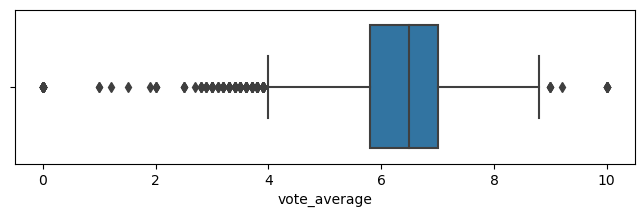

In [48]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['vote_average'])

<Axes: xlabel='vote_count'>

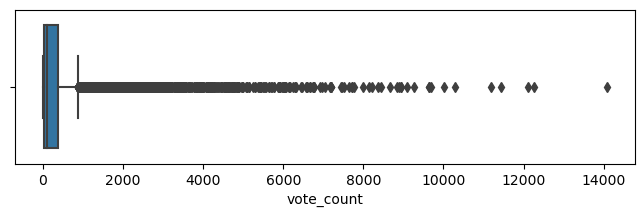

In [49]:
plt.figure(figsize = [8, 2])
sns.boxplot(x = movie_df['vote_count'])

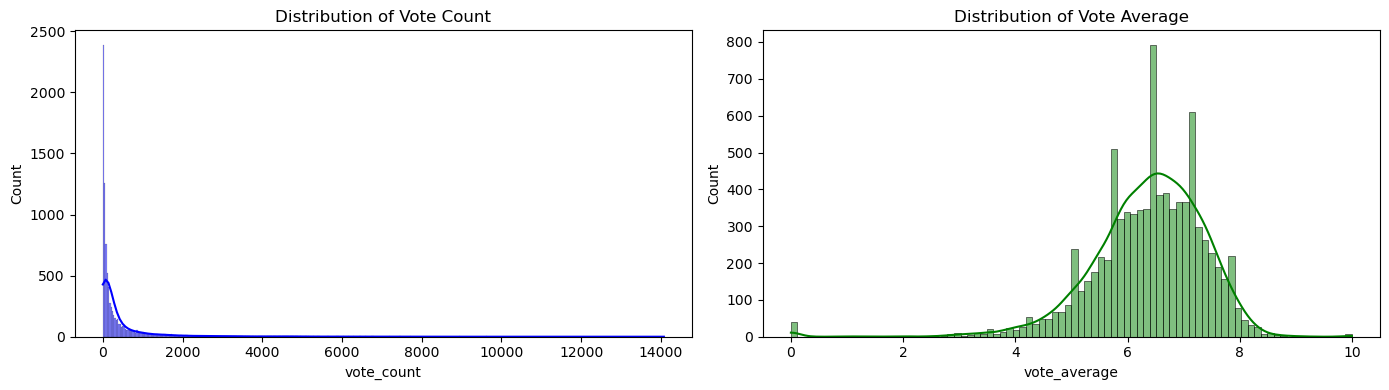

In [50]:
fig, ax = plt.subplots(1, 2, figsize = [14, 4])

sns.histplot(movie_df['vote_count'], kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Vote Count')

sns.histplot(movie_df['vote_average'], kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribution of Vote Average')

plt.tight_layout()
plt.show()

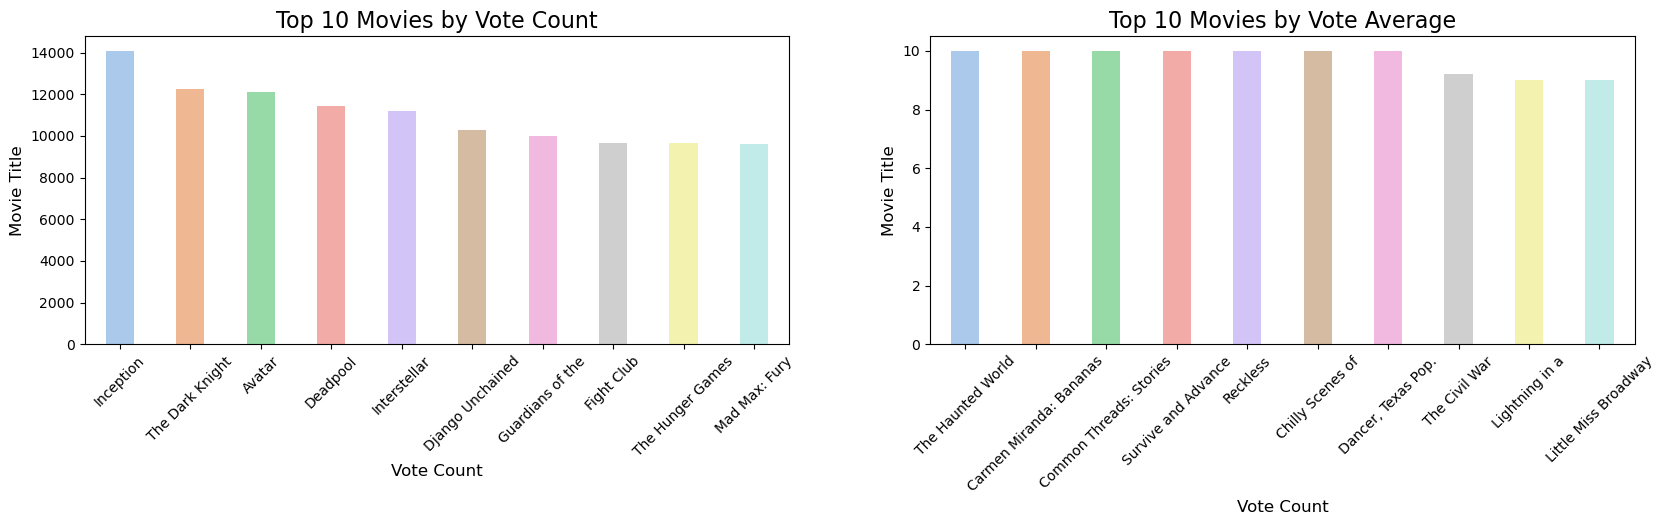

In [51]:
movie_df['title'] = movie_df['title'].apply(lambda x: ' '.join(x.split()[:3]))

mov_count = movie_df[['title', 'vote_count']].sort_values(by = 'vote_count', ascending=False).head(10)
mov_avg = movie_df[['title', 'vote_average']].sort_values(by = 'vote_average', ascending=False).head(10)

plt.figure(figsize = [20, 4])
plt.subplot(1, 2, 1)
sns.barplot(x = 'title', y = 'vote_count', data = mov_count, palette = 'pastel', width = 0.4)
plt.title('Top 10 Movies by Vote Count', fontsize = 16)
plt.xlabel('Vote Count', fontsize = 12)
plt.ylabel('Movie Title', fontsize = 12)
plt.xticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.barplot(x = 'title', y = 'vote_average', data = mov_avg, palette = 'pastel', width = 0.4)
plt.title('Top 10 Movies by Vote Average', fontsize = 16)
plt.xlabel('Vote Count', fontsize = 12)
plt.ylabel('Movie Title', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [52]:
movie_df['cast']

0                     TomHanks TimAllen DonRickles
1          RobinWilliams JonathanHyde KirstenDunst
2             WalterMatthau JackLemmon Ann-Margret
3       WhitneyHouston AngelaBassett LorettaDevine
4              SteveMartin DianeKeaton MartinShort
                           ...                    
8736           IanZiering TaraReid DavidHasselhoff
8737       SidneyPoitier WendyCrewson JayO.Sanders
8738            AkshayKumar IleanaD'Cruz EshaGupta
8739            HrithikRoshan PoojaHegde KabirBedi
8740           PaulMcCartney RingoStarr JohnLennon
Name: cast, Length: 8740, dtype: object

In [53]:
cast_counts = movie_df['cast'].str.split(expand=True).stack().value_counts()
unique_cast = cast_counts.reset_index()
unique_cast.columns = ['Cast', 'Title Count']
unique_cast.head()

Cast  Title Count
0     RobertDeNiro           57
1      NicolasCage           47
2      BruceWillis           47
3  SamuelL.Jackson           44
4         TomHanks           42

In [54]:
unique_cast = unique_cast.head(20)

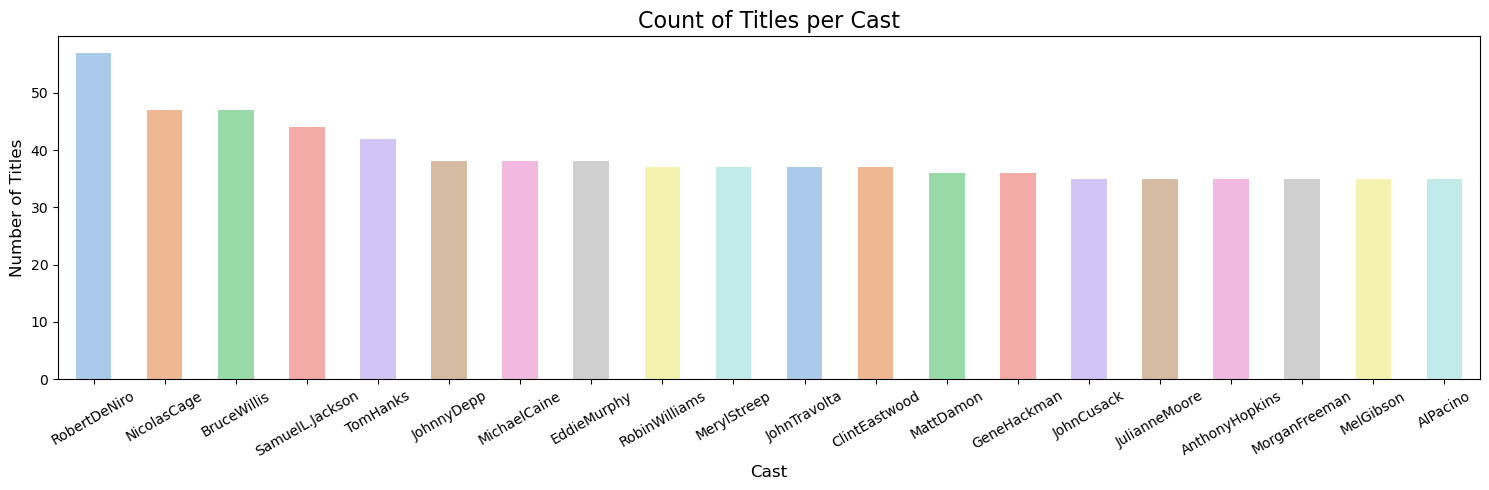

In [55]:
plt.figure(figsize = [15, 5])
sns.barplot(x = 'Cast', y = 'Title Count', data = unique_cast, palette = 'pastel', width = 0.5)
plt.title('Count of Titles per Cast', fontsize = 16)
plt.xlabel('Cast', fontsize = 12)
plt.ylabel('Number of Titles', fontsize = 12)
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

In [56]:
movie_df['keywords']

0       jealousy toy boy friendship friends rivalry bo...
1       boardgame disappearance basedonchildren'sbook ...
2          fishing bestfriend duringcreditsstinger oldmen
3       basedonnovel interracialrelationship singlemot...
4       baby midlifecrisis confidence aging daughter m...
                              ...                        
8736    sharkattack sequel farce lasvegas creaturefeature
8737                               friendship brickmaking
8738                                            bollywood
8739                                            bollywood
8740                                    music documentary
Name: keywords, Length: 8740, dtype: object

In [57]:
keyword_counts = movie_df['keywords'].str.split(expand=True).stack().value_counts()
unique_keyword = keyword_counts.reset_index()
unique_keyword.columns = ['Keywords', 'Title Count']
unique_keyword.head()

Keywords  Title Count
0       independentfilm          596
1         womandirector          526
2                murder          375
3  duringcreditsstinger          313
4          basedonnovel          294

In [58]:
unique_keyword = unique_keyword.head(20)

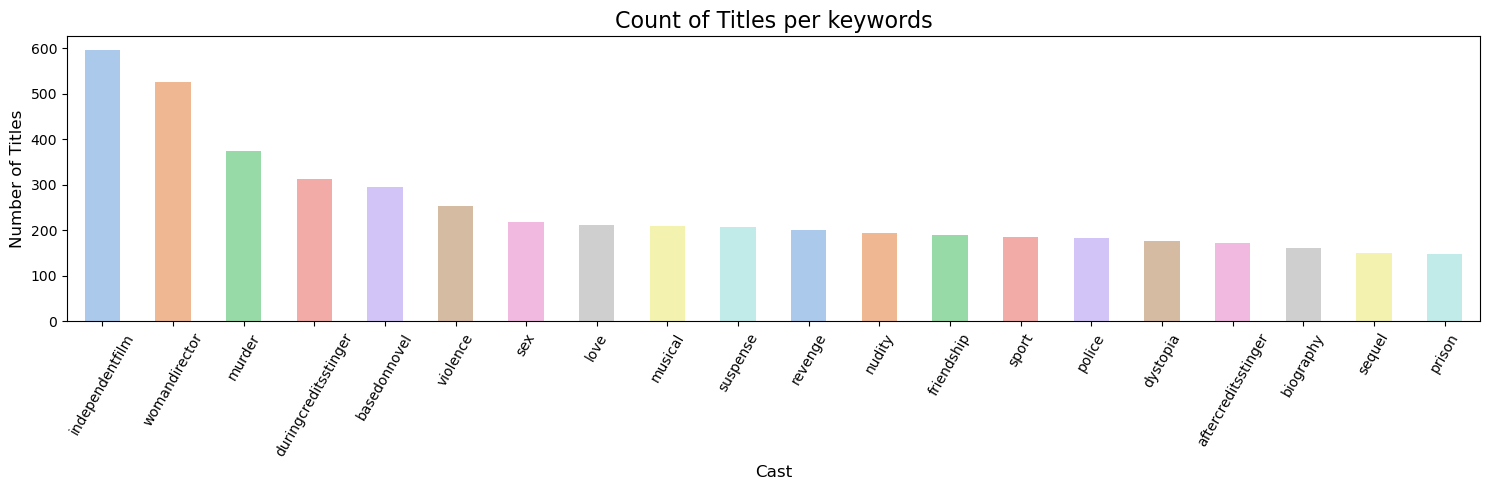

In [59]:
plt.figure(figsize = [15, 5])
sns.barplot(x = 'Keywords', y = 'Title Count', data = unique_keyword, palette = 'pastel', width = 0.5)
plt.title('Count of Titles per keywords', fontsize = 16)
plt.xlabel('Cast', fontsize = 12)
plt.ylabel('Number of Titles', fontsize = 12)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

In [60]:
movie_df.head()

budget                    genres     id                                           overview  popularity                                        poster_path                               production_companies      revenue  runtime  spoken_languages              title  vote_average  vote_count                                        cast            crew                                           keywords  rating
0  30000000   Animation Comedy Family    862  Led by Woody, Andy's toys live happily in his ...       19.50  <img src='https://image.tmdb.org/t/p/w185//rhI...                            Pixar Animation Studios 373554033.00    81.00           English          Toy Story          7.70     5415.00                TomHanks TimAllen DonRickles    JohnLasseter  jealousy toy boy friendship friends rivalry bo...    3.00
1  65000000  Adventure Fantasy Family   8844  When siblings Judy and Peter discover an encha...       17.00  <img src='https://image.tmdb.org/t/p/w185//vzm...  TriStar Pictures Teitler Film Interscope Commu... 262797249.00   104.00  English Français            Jumanji          6.90     2413.00     RobinWilliams JonathanHyde KirstenDunst     JoeJohnston  boardgame disappearance basedonchildren'sbook ...    2.00
2         0            Romance Comedy  15602  A family wedding reignites the ancient feud be...       11.00  <img src='https://image.tmdb.org/t/p/w185//6ks...                        Warner Bros. Lancaster Gate         0.00   101.00           English   Grumpier Old Men          6.50       92.00        WalterMatthau JackLemmon Ann-Margret    HowardDeutch     fishing bestfriend duringcreditsstinger oldmen    4.00
3  16000000      Comedy Drama Romance  31357  Cheated on, mistreated and stepped on, the wom...        3.00  <img src='https://image.tmdb.org/t/p/w185//16X...             Twentieth Century Fox Film Corporation  81452156.00   127.00           English  Waiting to Exhale          6.10       34.00  WhitneyHouston AngelaBassett LorettaDevine  ForestWhitaker  basedonnovel interracialrelationship singlemot...    3.00
4         0                    Comedy  11862  Just when George Banks has recovered from his ...        8.00  <img src='https://image.tmdb.org/t/p/w185//e64...          Sandollar Productions Touchstone Pictures  76578911.00   106.00           English      Father of the          5.70      173.00         SteveMartin DianeKeaton MartinShort    CharlesShyer  baby midlifecrisis confidence aging daughter m...    4.50

In [66]:
qualified = movie_df[['title', 'vote_count', 'vote_average', 'popularity', 'genres']]

In [71]:
vote_counts = movie_df[movie_df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movie_df[movie_df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.920938215102975

In [72]:
m = vote_counts.quantile(0.95)
m

2049.0

In [73]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [74]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [75]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

In [76]:
qualified.head(15)

title  vote_count  vote_average  popularity                                            genres   wr
283   The Shawshank Redemption     8358.00          8.50       19.50                                       Drama Crime 7.99
6696           The Dark Knight    12269.00          8.30       19.50                       Drama Action Crime Thriller 7.96
2336                Fight Club     9678.00          8.30       19.50                                             Drama 7.88
689              The Godfather     6024.00          8.50       19.50                                       Drama Crime 7.85
266               Pulp Fiction     8670.00          8.30       19.50                                    Thriller Crime 7.85
7316                 Inception    14075.00          8.10       19.50  Action Thriller ScienceFiction Mystery Adventure 7.82
8222              Interstellar    11187.00          8.10       19.50                    Adventure Drama ScienceFiction 7.76
320               Forrest Gump     8147.00          8.20       19.50                              Comedy Drama Romance 7.74
4922               The Lord of     8226.00          8.10       19.50                          Adventure Fantasy Action 7.67
944         The Empire Strikes     5998.00          8.20       19.00                   Adventure Action ScienceFiction 7.62
3807               The Lord of     8892.00          8.00       19.50                          Adventure Fantasy Action 7.61
232                  Star Wars     6778.00          8.10       19.50                   Adventure Action ScienceFiction 7.59
7699          The Intouchables     5410.00          8.20       16.00                                      Drama Comedy 7.57
8314          Guardians of the    10014.00          7.90       19.50                   Action ScienceFiction Adventure 7.56
4315               The Lord of     7641.00          8.00       19.50                          Adventure Fantasy Action 7.56

    These are the top movies as per the ratings.